# Exercises

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
    
**EXERCISE 1: Climate Change and Sea Ice Extent**<p>

We want to answer the question: Has there been a decrease in the amount of ice in the last years?

For that we will use the sea ice extent measurements from the [National Snow & Ice Data Center](https://nsidc.org).<p>

We perform the following processing steps:

</li>
<ol>
<ul>
</ul>
<li> We must read and clean the data.
<li> To compute the tendency for a given interval of time (month), we need to normalize the data.
<li> This values can be plotted for the entire time series or for particular months. 
<li> We can compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.
<li> We can also estimate the extent value for 2025.

</ol>
</div>

In [1]:
# Load the data and show the info and contents:
import pandas as pd
ice = pd.read_csv('../data/SeaIce.txt', sep=r'\s+')
print('shape: {}'.format(ice.shape))
ice.head()

shape: (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


To compute the anomaly for a given interval of time, we can compute the mean for that interval of time (using the period 1981 through 2010 for the mean extend), before data cleaning.

In [2]:
# Compute monthly climatology (1981–2010) and anomalies

year_col = "year"
month_col = "mo"
extent_col = "extent"

# monthly mean extent over reference period 1981–2010
clim = (
    ice.loc[(ice[year_col] >= 1981) & (ice[year_col] <= 2010)]
        .groupby(month_col)[extent_col]
        .mean()
        .rename("climatology")
)

# join climatology back to full dataset
ice = ice.merge(clim, on=month_col)

# anomaly = extent – climatological monthly mean
ice["anomaly"] = ice[extent_col] - ice["climatology"]

ice.head()

,year,mo,data_type,region,extent,area,climatology,anomaly
0,1979,1,Goddard,N,15.54,12.33,-319.252333,334.792333
1,1980,1,Goddard,N,14.96,11.85,-319.252333,334.212333
2,1981,1,Goddard,N,15.03,11.82,-319.252333,334.282333
3,1982,1,Goddard,N,15.26,12.11,-319.252333,334.512333
4,1983,1,Goddard,N,15.10,11.92,-319.252333,334.352333


## Visualization

### The importance of plotting

Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties.

<center><img src="./images/Anscombe's_quartet_3.svg"  width="600"></center>

Source [Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).



### Example 1: Housing Data

We'll continue with our Boston housing dataset

In [3]:
from pandas import read_csv
import pandas as pd
import matplotlib.pylab as plt


#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_boston = read_csv('../data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df_boston['PRICE'] = df_boston['MEDV']

### Histograms

Text(0, 0.5, 'count')

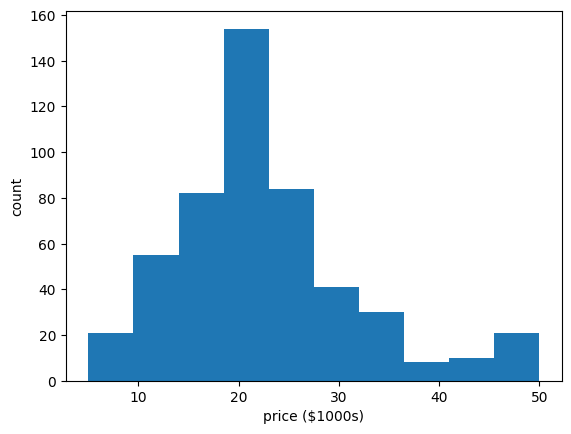

In [4]:
# Histogram of prices:
plt.hist(df_boston.PRICE) 
plt.xlabel('price ($1000s)')
plt.ylabel('count')

### Linear Regression Visualization: Seaborn lmplot

The ``lmplot()`` function from the Seaborn module is intended for exploring linear relationships of different forms in multidimensional datesets. Input data must be in a Pandas ``DataFrame``. To plot, provide the predictor and response variable names along with the dataset

We first consider the task of predicting median house values in the Boston area using as the predictor one of the attributes, for instance, LSTAT, defined as the "proportion of lower status of the population".
Seaborn visualization can be used to show this linear relationships easily:

We will use the variable price as our response $\textbf{y}$ and LSTAT as our predictor $\textbf{x}$.


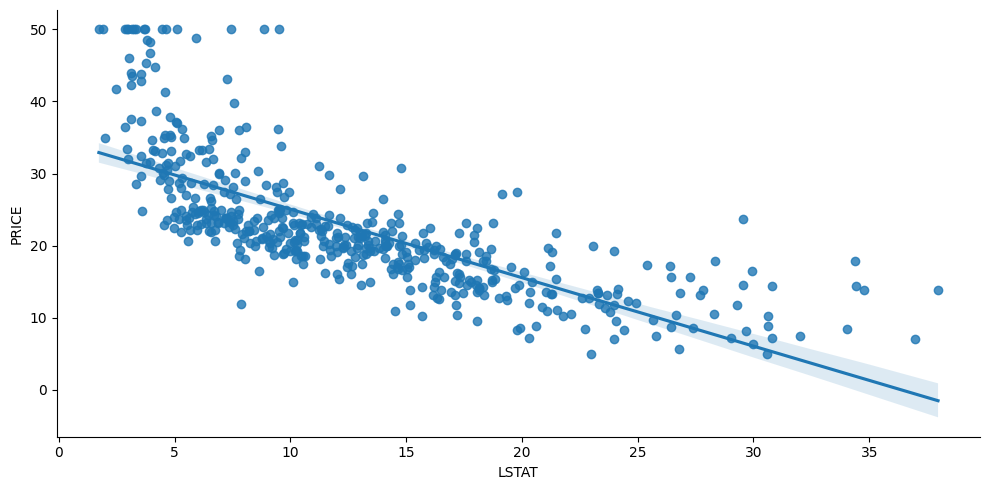

In [5]:
import seaborn as sns
# Visualization of the relations between price and LSTAT
sns.lmplot(x="LSTAT", y="PRICE", data=df_boston, aspect=2);

lmplot has two main components. 

+ The first is a scatterplot, showing the observed datapoints. 
+ The second is a regression line, showing the estimated linear model relating the two variables. Because the regression line is only an estimate, it is plotted with a 95% confidence band to give an impression of the certainty in the model (using Bootstraping).

Is the relationship between the house price and ``lstat`` non-linear? Is the straight line a poor fit? Maybe a better fit can be obtained by including higher order terms:

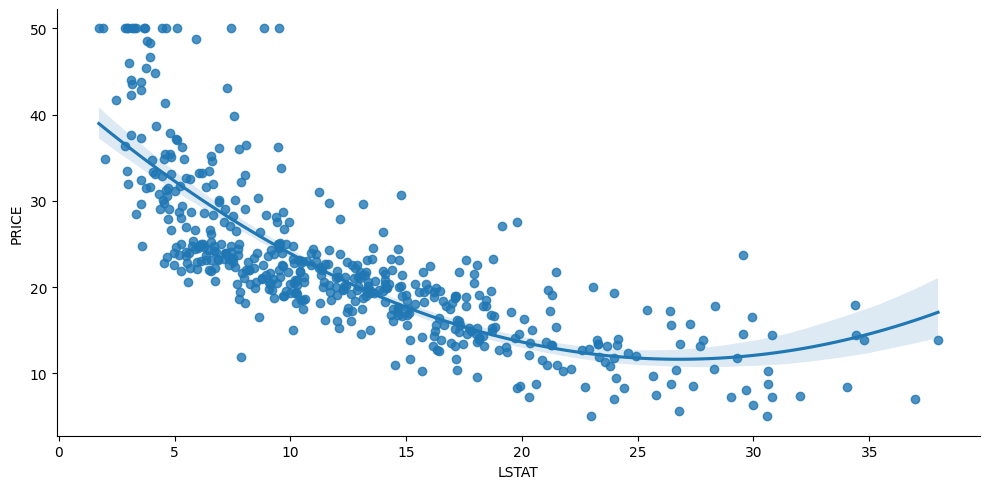

In [6]:
# Estimate a polynomial regression of order 2
sns.lmplot(x="LSTAT", y="PRICE", data=df_boston, aspect=2, order=2);

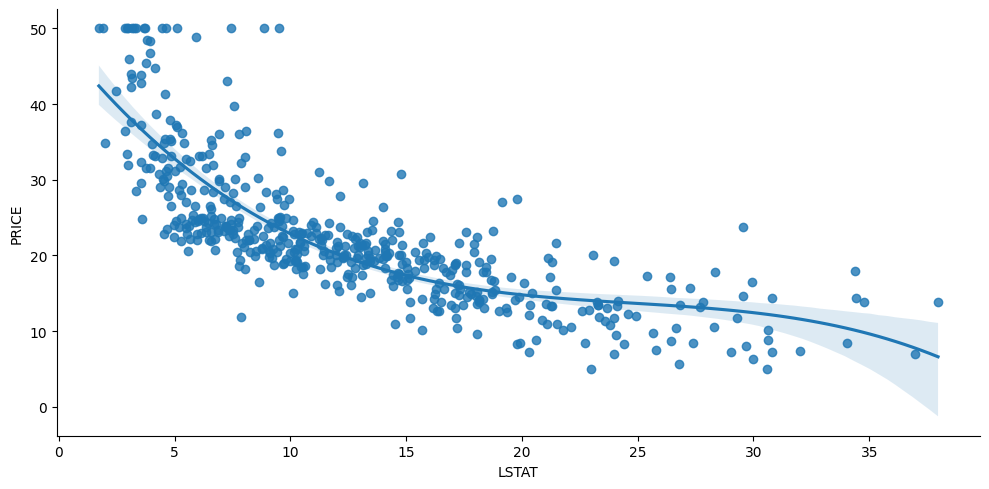

In [7]:
# Estimate a polynomial regression of order 3
sns.lmplot(x="LSTAT", y="PRICE", data=df_boston, aspect=2, order=3);


What if we consider variable RM or AGE?

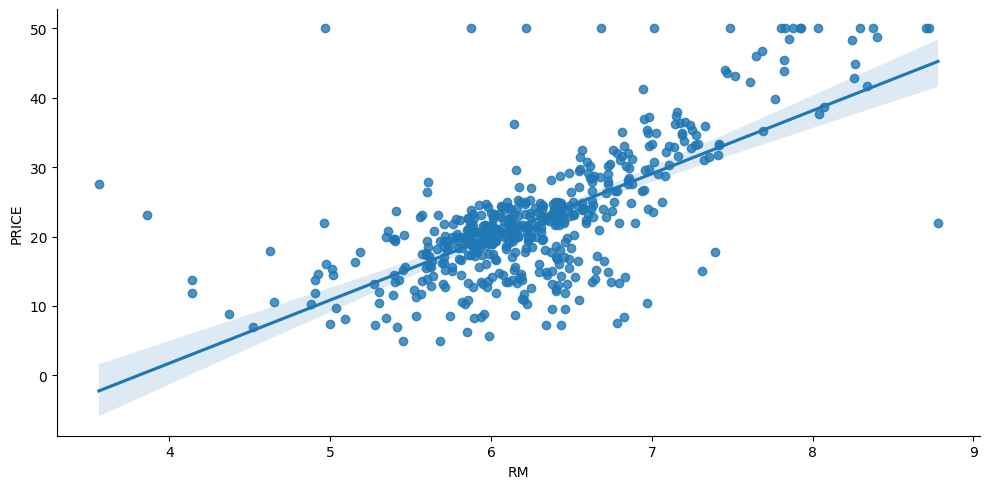

In [8]:
# Visualization of the relations between price and "average number of rooms per dwelling"
sns.lmplot(x="RM", y="PRICE", data=df_boston, aspect=2);

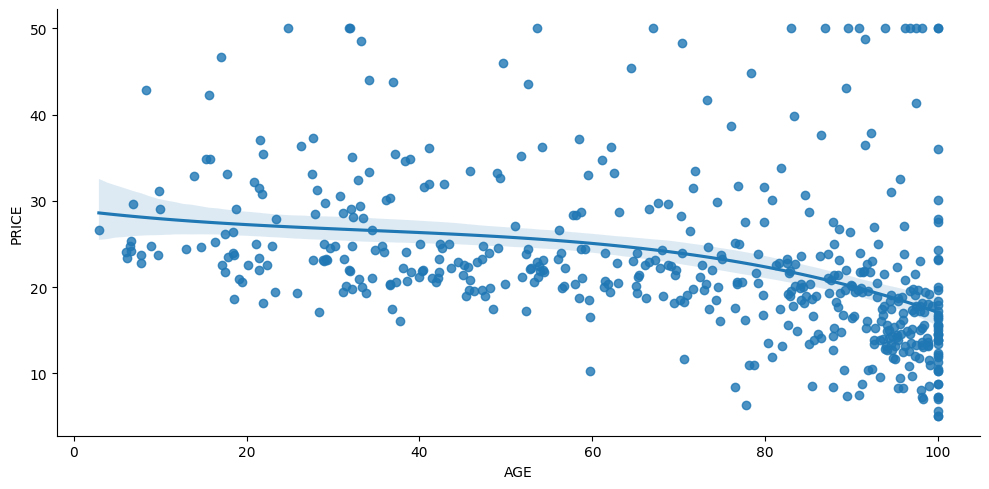

In [9]:
# Visualization of the relations between price and "proportion of owner-occupied units built prior to 1940"
sns.lmplot(x="AGE", y="PRICE", data=df_boston, aspect=2, order=3);

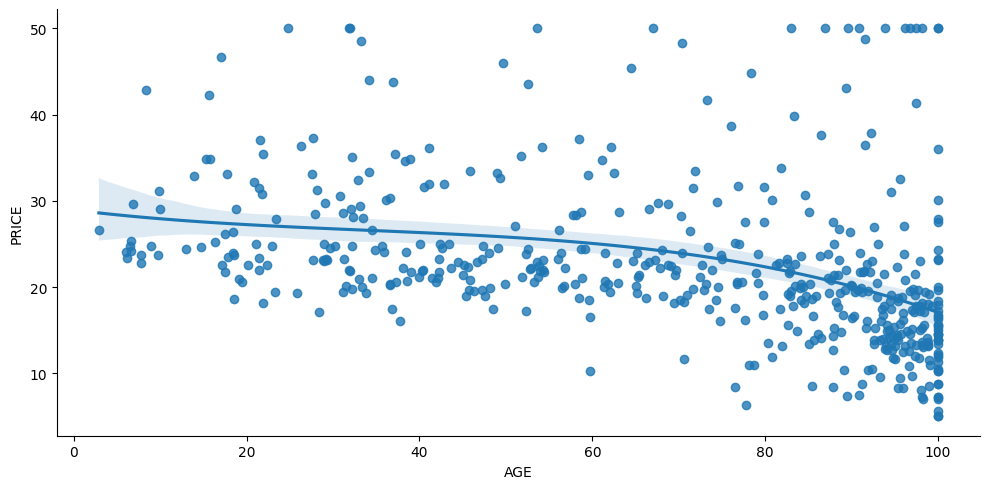

In [10]:
# Visualization of the relations between price and "proportion of owner-occupied units built prior to 1940"
sns.lmplot(x="AGE", y="PRICE", data=df_boston, aspect=2, order=3);

### Heatmap

We can also use corr function from Pandas and heatmap function from Seaborn for studying the variables relationship, plotting a diagonal correlation matrix.

<Axes: >

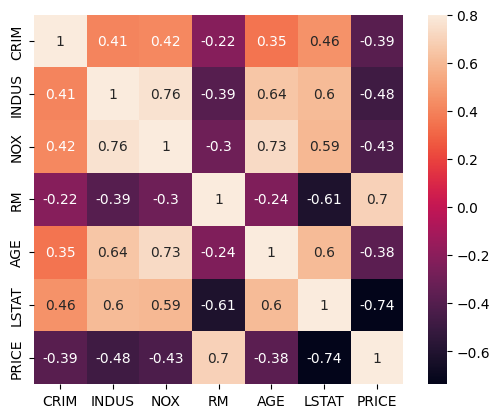

In [11]:
features2 = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'LSTAT', 'PRICE'] # To plot just 7 of the 13 variables: PRICE, LSTAT, AGE, RM, NOX, INDUS, CRIM.
df_boston2 = df_boston[features2]
corrmat = df_boston2.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

### Scatter plot matrix

Let's explore multiple variables relationships using a scatter plot matrix. The scatter plot is a grid of plots of multiple varaibles one against the other, showing the pairwise relationship of each variable to the others.

For the sake of visualization, we choose 3 from the set of 13 variables:

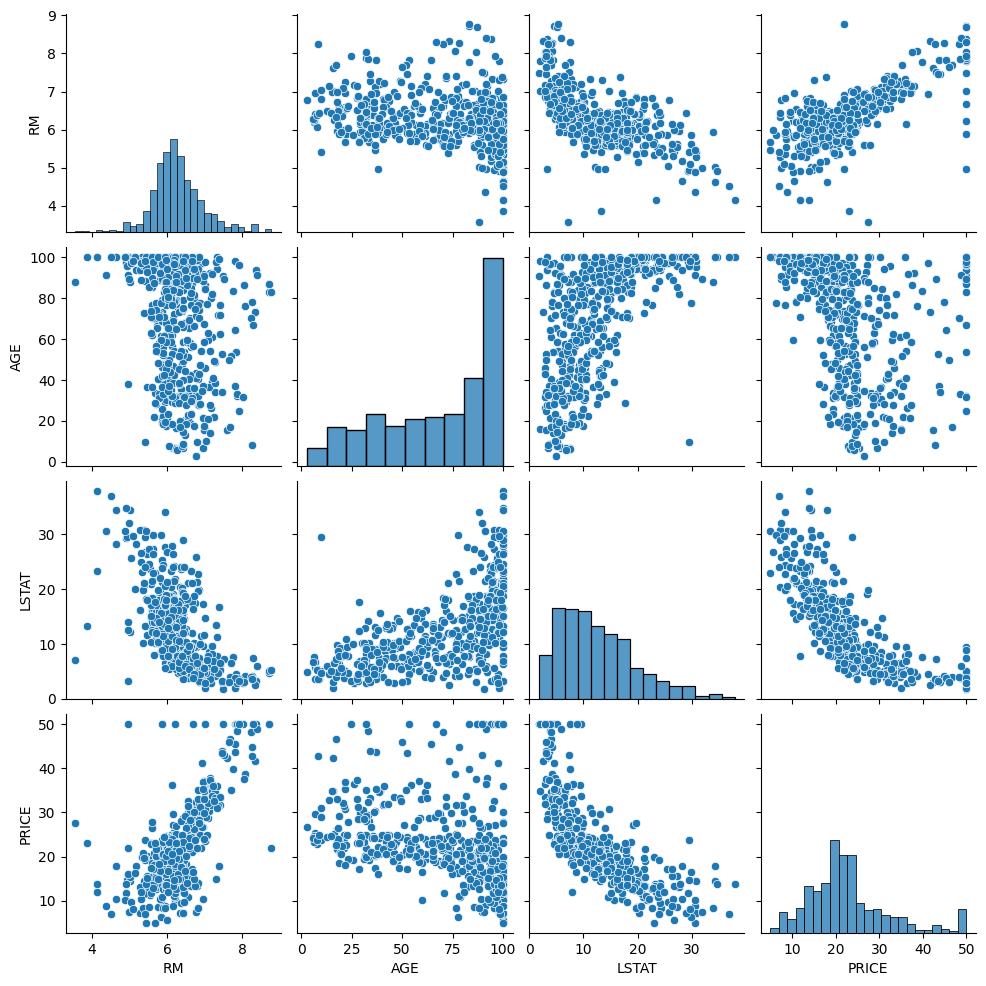

In [12]:
features3 = ['RM','AGE','LSTAT', 'PRICE'] 
df_boston3 = df_boston[features3]
sns.pairplot(df_boston3) # Plot pairwise relationships in the dataset

We can visually analyze the pairwise relationships in the scatter plots. The diagonal axe contains a plot to show the univariate distribution of the data for the variable in that column.

You can create the same scatter plot matrix using the scatter_matrix method in pandas.tools.plotting:

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='AGE', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='PRICE', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='AGE'>,
        <Axes: xlabel='AGE', ylabel='AGE'>,
        <Axes: xlabel='LSTAT', ylabel='AGE'>,
        <Axes: xlabel='PRICE', ylabel='AGE'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='AGE', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='PRICE', ylabel='LSTAT'>],
       [<Axes: xlabel='RM', ylabel='PRICE'>,
        <Axes: xlabel='AGE', ylabel='PRICE'>,
        <Axes: xlabel='LSTAT', ylabel='PRICE'>,
        <Axes: xlabel='PRICE', ylabel='PRICE'>]], dtype=object)

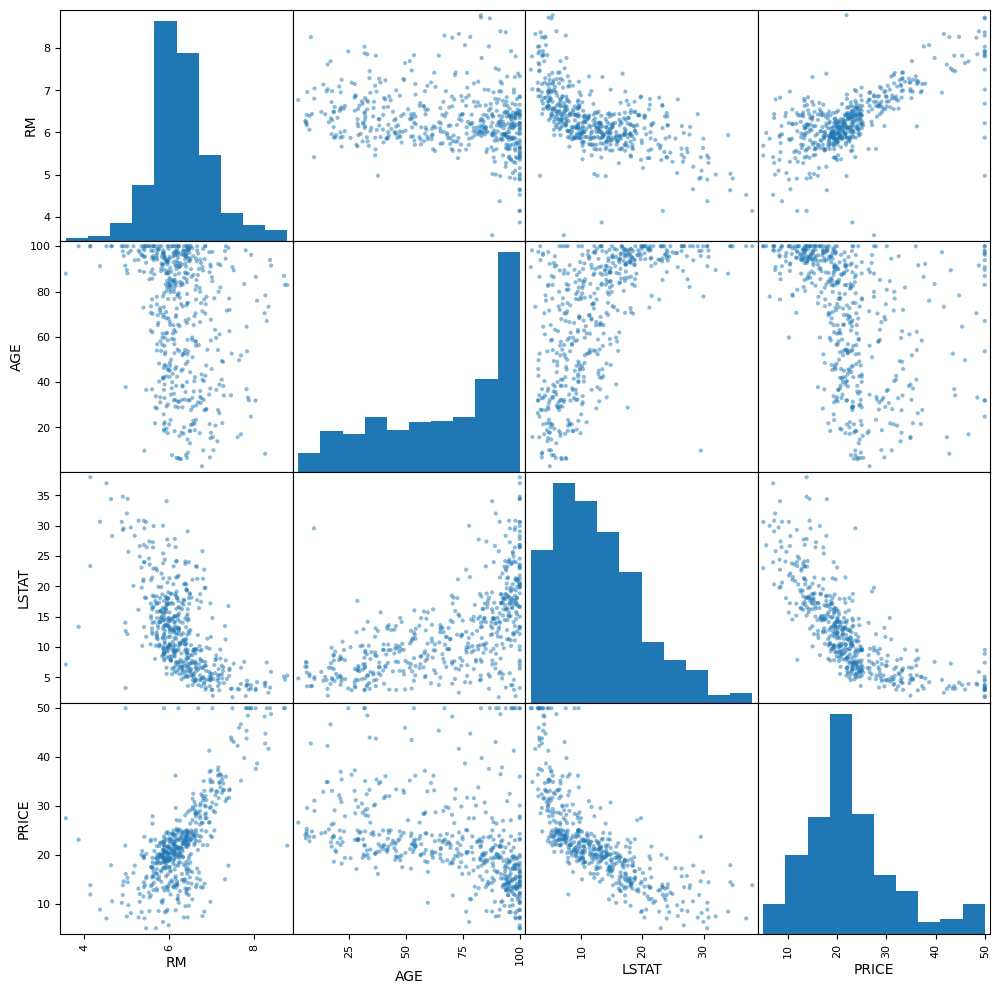

In [13]:
pd.plotting.scatter_matrix(df_boston3, figsize=(12.0,12.0))  

**Plots for the fitting evaluation:**

We can often learn a lot about how well our model did by analyzing the predictions and residuals with two interesting plots: 
- An scatter plot of the observed values $y$ versus the predicted value $\hat y$ 
- An scatter plot residuals $y_i - \hat y_i$ vs. $\hat y_i$.

In both cases we can add a line to show which would be the perfect result. 

Text(0, 0.5, 'Predicted price ($1000s)')

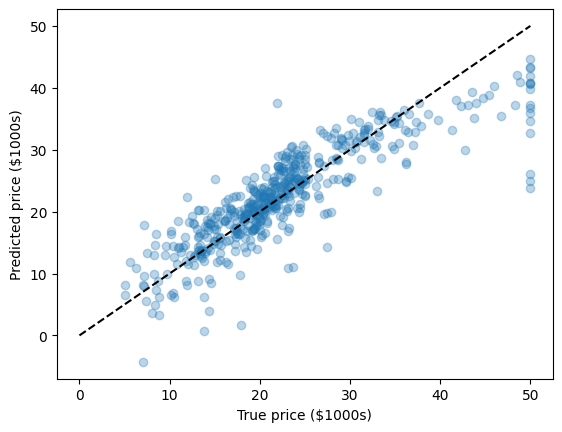

In [14]:
from sklearn.linear_model import LinearRegression

# Assuming your DataFrame is named 'df_boston'
X = df_boston.drop(['PRICE', 'MEDV'], axis=1)  # Select features (all columns except 'PRICE')
y = df_boston['PRICE']  # Target variable

reg = LinearRegression() # Create the Linear Regression estimator
reg.fit(X, y) # Fitting with all the features
y_pred = reg.predict(X) # Perform prediction of all the data

# Visualization of target and predicted responses of the boston data:
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

Text(0, 0.5, '$y - \\hat y$')

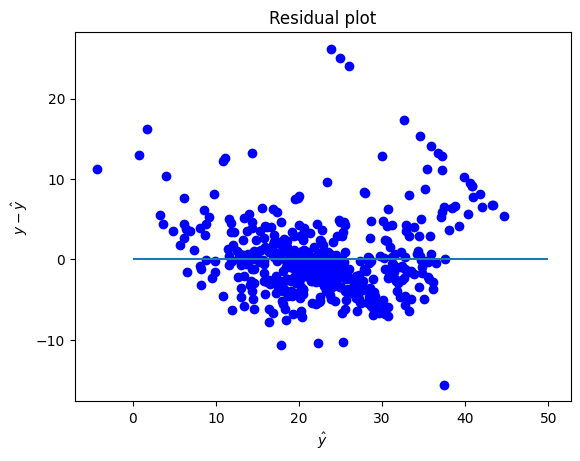

In [15]:
x_plot = plt.scatter(y_pred, (y-y_pred), c='b')
plt.hlines(y=0, xmin= 0, xmax=50)
plt.title('Residual plot')
plt.xlabel(r'$\hat y$')
plt.ylabel(r'$y - \hat y$')

Intuitively, if the model is good, then a plot of the residuals ($y_i - \hat y_i$) against the fitted values ($\hat y_i$) should look like noise (i.e., there shouldn't be any visible patterns).

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE 2** Diabetes <p>

The diabetes dataset (from scikit-learn) consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year.<p>

We will divide in training and testing sets and evaluate the prediction (using sklearn) with a simple and a multiple regression model.<p>

Fill the gaps of the exercise.

</div>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets

diabetes = datasets.load_diabetes()
X,y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names
print(X.shape, y.shape)
print(feature_names)

(442, 10) (442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


First visualize the data. Plot a histogram of the target variable.

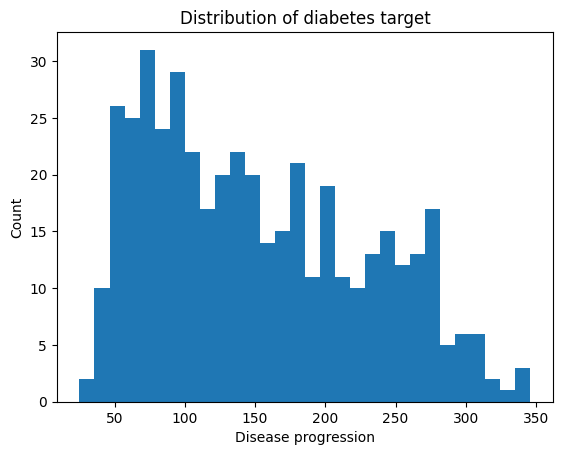

In [17]:
# Histogram of the target variable (disease progression)
plt.hist(y, bins=30)
plt.xlabel("Disease progression")
plt.ylabel("Count")
plt.title("Distribution of diabetes target")
plt.show()

Divide in training and testing sets

In [18]:
# Train/test split (use 20% for test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

X_train.shape, X_test.shape

((353, 10), (89, 10))

For the simple model, first choose one of the dimensions of the data. Try some plots to identify possible linear relationships between the predictor and target variables. Pick one variable for your first model.

In [19]:
# Choose one feature, e.g. BMI
feature_index = 2  # index of 'bmi'
print("Using feature:", feature_names[feature_index])

x_train = X_train[:, feature_index].reshape(-1, 1)
x_test  = X_test[:, feature_index].reshape(-1, 1)

Using feature: bmi


Visualize the data using scatter plot (plt.scatter):

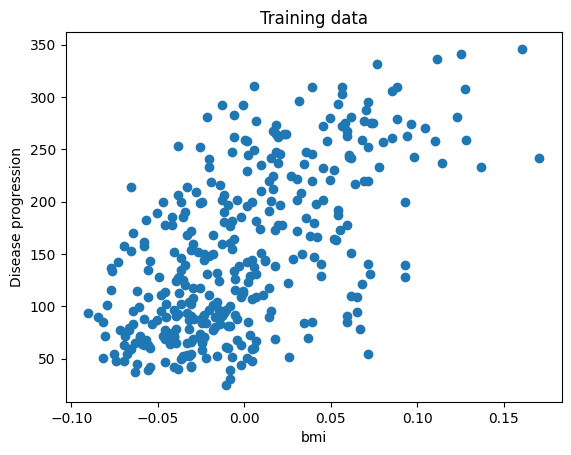

In [20]:
# Scatter plot of chosen feature vs target (train only)
plt.scatter(x_train, y_train)
plt.xlabel(feature_names[feature_index])
plt.ylabel("Disease progression")
plt.title("Training data")
plt.show()

Visualize the data using scatter plot (plt.scatter) and two different colors for train and test data:

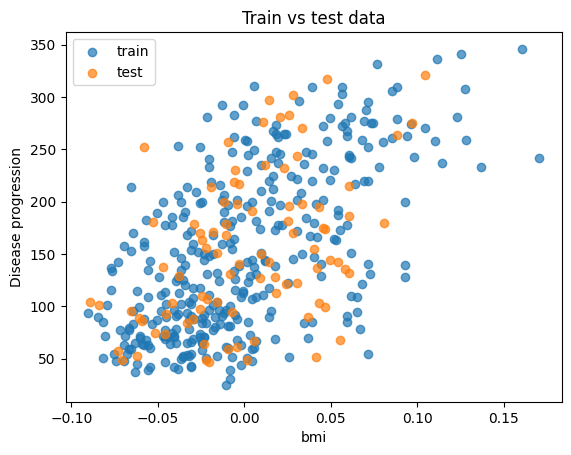

In [21]:
# Scatter plot with train and test in different colors
plt.scatter(x_train, y_train, label="train", alpha=0.7)
plt.scatter(x_test,  y_test,  label="test",  alpha=0.7)
plt.xlabel(feature_names[feature_index])
plt.ylabel("Disease progression")
plt.title("Train vs test data")
plt.legend()
plt.show()

Train and evaluate the score of the test set.

In [22]:
# Train simple linear regression model on the single feature
lin_simple = LinearRegression()
lin_simple.fit(x_train, y_train)

train_score = lin_simple.score(x_train, y_train)
test_score  = lin_simple.score(x_test,  y_test)

print("Simple model (feature: {})".format(feature_names[feature_index]))
print("R^2 on train:", train_score)
print("R^2 on test :", test_score)

Simple model (feature: bmi)
R^2 on train: 0.3756308132776308
R^2 on test : 0.19057346847560142


Calculate the Mean Squared Error on the train and test set:

In [23]:
# Mean Squared Error on train and test
y_train_pred = lin_simple.predict(x_train)
y_test_pred  = lin_simple.predict(x_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test,  y_test_pred)

print("MSE (train):", mse_train)
print("MSE (test) :", mse_test)

MSE (train): 3827.8186984113813
MSE (test) : 4150.6801893299835


Visualize the predicted line together with a scatter plot of the training set.

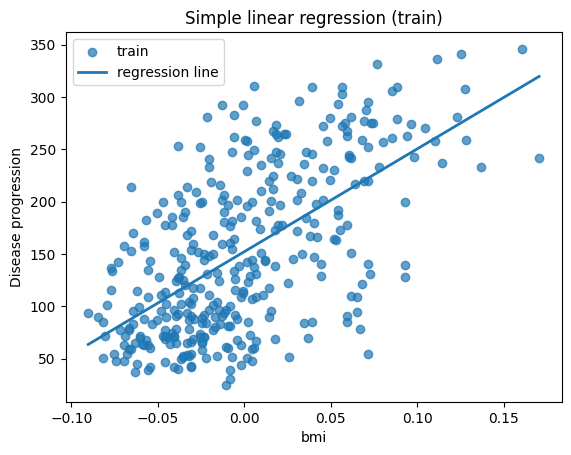

In [24]:
# Plot regression line with training data
plt.scatter(x_train, y_train, alpha=0.7, label="train")

# sort for a nice line
x_line = np.linspace(x_train.min(), x_train.max(), 100).reshape(-1, 1)
y_line = lin_simple.predict(x_line)

plt.plot(x_line, y_line, linewidth=2, label="regression line")
plt.xlabel(feature_names[feature_index])
plt.ylabel("Disease progression")
plt.title("Simple linear regression (train)")
plt.legend()
plt.show()

Visualize the predicted line together with a scatter plot of the training set.

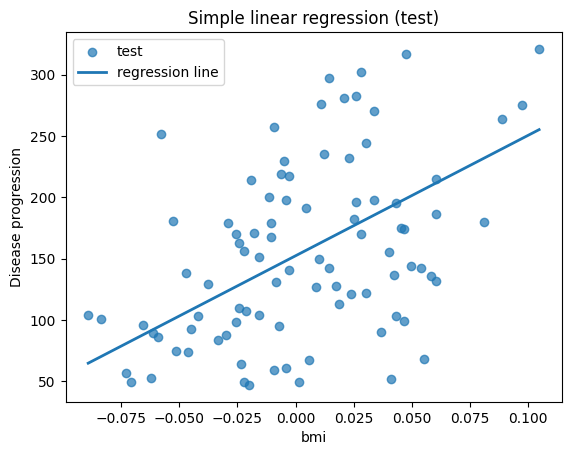

In [25]:
# Plot regression line with test data
plt.scatter(x_test, y_test, alpha=0.7, label="test")

x_line = np.linspace(x_test.min(), x_test.max(), 100).reshape(-1, 1)
y_line = lin_simple.predict(x_line)

plt.plot(x_line, y_line, linewidth=2, label="regression line")
plt.xlabel(feature_names[feature_index])
plt.ylabel("Disease progression")
plt.title("Simple linear regression (test)")
plt.legend()
plt.show()

For multiple regression model divide in training and testing sets and evaluate the prediction (sklearn)

In [26]:
# Multiple regression using all 10 features
lin_multi = LinearRegression()
lin_multi.fit(X_train, y_train)

train_score_multi = lin_multi.score(X_train, y_train)
test_score_multi  = lin_multi.score(X_test,  y_test)

print("Multiple regression (all 10 features)")
print("R^2 on train:", train_score_multi)
print("R^2 on test :", test_score_multi)

Multiple regression (all 10 features)
R^2 on train: 0.5539250081377072
R^2 on test : 0.3322332173106184


Is the score improving using all 10 variables?

In [27]:
# The multiple regression (all 10 features) gives a better R² on the test set than the simple model with only one feature, although the improvement isn’t huge.

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**Exercice 3: Macroeconomic Dataset**<p>
    
In the following example we will use the Longley dataset of US macroeconomic data from the R datasets website. We want to explore the relationships between the Total Derived Employment ('Employed') and the other variables.

<ul>
<li>Is there a linear relationship between the Gross National Product ('GNP') and the Total Derived Employment ('Employed')?</li>
<li>Is there a linear relationship between the population and the Total Derived Employment ('Employed')?</li>
<li>Is there a linear relationship between the armed forces and the unemployed?</li>
<li>Can you see any non-linear effects between the armed forces and the unemployed?</li>
<li>Try to use higher order models to the fitting of GNP with Population.</li>
</ul>
    
</div>

In [28]:
import seaborn as sns
import pandas as pd

# Read data
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
rownames,,,,,,,
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


Is there a linear relationship between the Gross National Product ('GNP') and the Total Derived Employment ('Employed')?

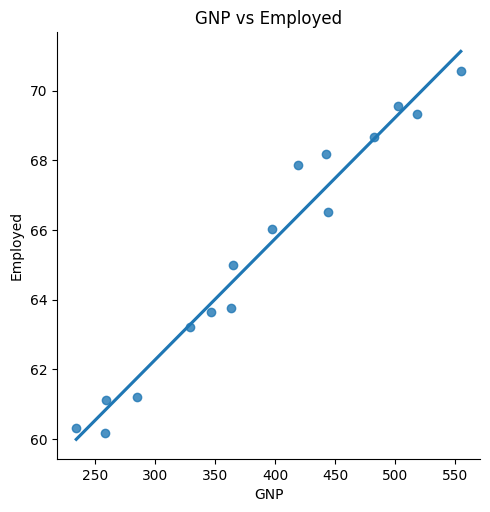

Correlation GNP–Employed:
               GNP  Employed
GNP       1.000000  0.983552
Employed  0.983552  1.000000


In [29]:
# Linear relationship between GNP and Employed
sns.lmplot(x="GNP", y="Employed", data=df, ci=None)
plt.title("GNP vs Employed")
plt.show()

print("Correlation GNP–Employed:")
print(df[["GNP", "Employed"]].corr())

Is there a linear relationship between the population and the Total Derived Employment ('Employed')?

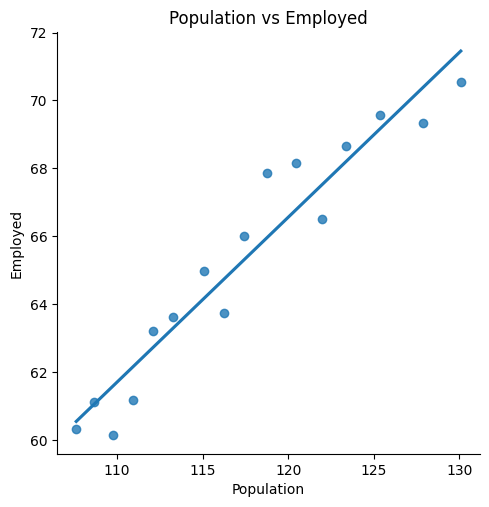

Correlation Population–Employed:
            Population  Employed
Population    1.000000  0.960391
Employed      0.960391  1.000000


In [30]:
# Linear relationship between Population and Employed
sns.lmplot(x="Population", y="Employed", data=df, ci=None)
plt.title("Population vs Employed")
plt.show()

print("Correlation Population–Employed:")
print(df[["Population", "Employed"]].corr())

Is there a linear relationship between the armed forces and the unemployed?

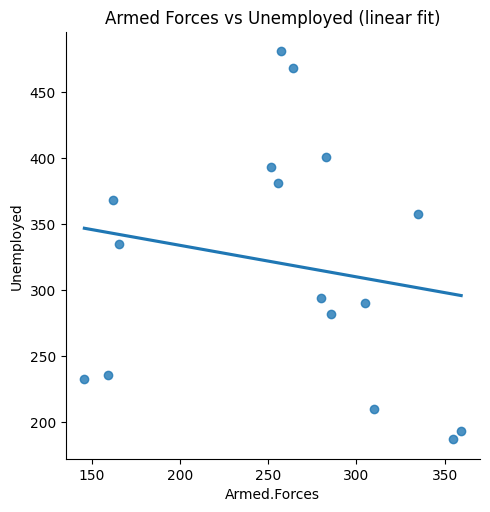

Correlation Armed.Forces–Unemployed:
              Armed.Forces  Unemployed
Armed.Forces      1.000000   -0.177421
Unemployed       -0.177421    1.000000


In [31]:
# Linear relationship between Armed.Forces and Unemployed
sns.lmplot(x="Armed.Forces", y="Unemployed", data=df, ci=None)
plt.title("Armed Forces vs Unemployed (linear fit)")
plt.show()

print("Correlation Armed.Forces–Unemployed:")
print(df[["Armed.Forces", "Unemployed"]].corr())

Can you see any non-linear effects between the armed forces and the unemployed?

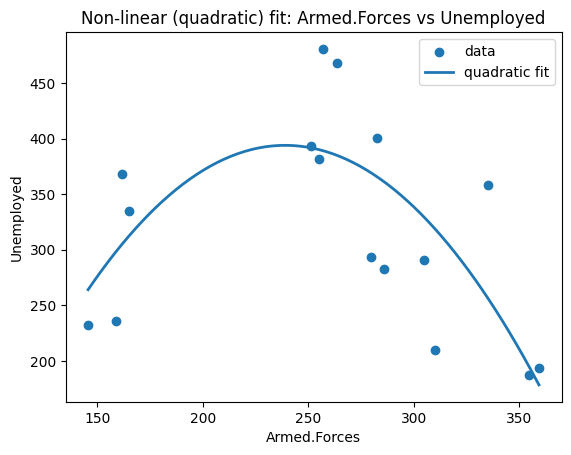

In [32]:
# Possible non-linear relationship between Armed.Forces and Unemployed
x = df["Armed.Forces"].values
y = df["Unemployed"].values

# quadratic polynomial fit
coeffs = np.polyfit(x, y, deg=2)
x_grid = np.linspace(x.min(), x.max(), 200)
y_grid = np.polyval(coeffs, x_grid)

plt.scatter(x, y, label="data")
plt.plot(x_grid, y_grid, linewidth=2, label="quadratic fit")
plt.xlabel("Armed.Forces")
plt.ylabel("Unemployed")
plt.title("Non-linear (quadratic) fit: Armed.Forces vs Unemployed")
plt.legend()
plt.show()

In [33]:
print("Quadratic coefficients (y = a x^2 + b x + c):", coeffs)

Quadratic coefficients (y = a x^2 + b x + c): [-1.48776477e-02  7.11249106e+00 -4.56213823e+02]


<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE 4: Advertising dataset**<p>


In the following example we will use the [advertising dataset](https://www.kaggle.com/purbar/advertising-data/data)which consists of the sales of products and their advertising budget in three different media TV, radio, newspaper.<p>
<ul>
    <li>Is there a linear relationship between the sales of products and the advertising budget in TV, radio or newspapers?</li>
    <li>Train a simple linear model for each variable to predict sales</li>
    <li>Train a multiple linear model to predict sales</li>
    <li>Compare the different models. Which one's performed best?</li>
</ul>

Dataset from the book: "An Introduction to Statistical Learning with Applications in R”. Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.<p>


</div>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset (adjust path/filename if needed)
adv = pd.read_csv("../data/Advertising.csv")
adv.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


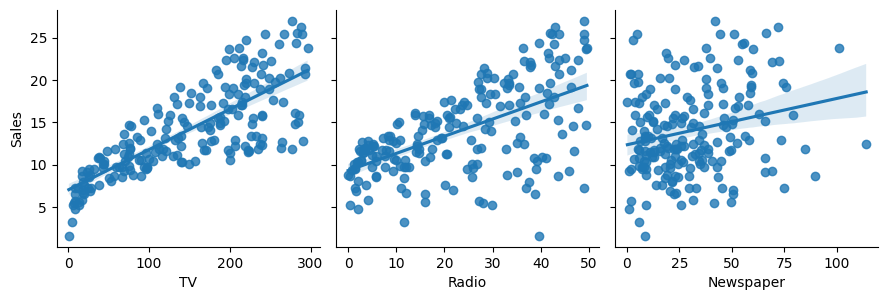

In [35]:
# Pairplot to visually inspect linear relationships
sns.pairplot(adv, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", height=3, kind="reg")
plt.show()

In [36]:
# Simple linear models for each medium
X_tv = adv[["TV"]]
X_radio = adv[["Radio"]]
X_news = adv[["Newspaper"]]
y = adv["Sales"]

def simple_model(X, y, name):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=0)
    m = LinearRegression()
    m.fit(X_tr, y_tr)
    y_tr_pred = m.predict(X_tr)
    y_te_pred = m.predict(X_te)
    print(f"=== {name} ===")
    print("R^2 train:", r2_score(y_tr, y_tr_pred))
    print("R^2 test :", r2_score(y_te, y_te_pred))
    print("MSE train:", mean_squared_error(y_tr, y_tr_pred))
    print("MSE test :", mean_squared_error(y_te, y_te_pred))
    print("Coefficient:", m.coef_[0], "Intercept:", m.intercept_)
    print()

simple_model(X_tv,    y, "TV")
simple_model(X_radio, y, "Radio")
simple_model(X_news,  y, "Newspaper")

=== TV ===
R^2 train: 0.5884742462828709
R^2 test : 0.6763151577939723
MSE train: 10.617238416139852
MSE test : 10.186181934530211
Coefficient: 0.04600778960301721 Intercept: 7.292493773559356

=== Radio ===
R^2 train: 0.35671845263128465
R^2 test : 0.22981692241915963
MSE train: 16.596466917138976
MSE test : 24.237233037132135
Coefficient: 0.20651176537911192 Intercept: 9.387577017342657

=== Newspaper ===
R^2 train: 0.0644163673549869
R^2 test : -0.021217489521373478
MSE train: 24.13777119975384
MSE test : 32.13714634300907
Coefficient: 0.060303781082761 Intercept: 12.400810905018648



In [37]:
# Multiple linear regression with all three media
X_all = adv[["TV", "Radio", "Newspaper"]]
X_tr, X_te, y_tr, y_te = train_test_split(X_all, y, test_size=0.2, random_state=0)

model_all = LinearRegression()
model_all.fit(X_tr, y_tr)

y_tr_pred = model_all.predict(X_tr)
y_te_pred = model_all.predict(X_te)

print("=== Multiple regression: TV + radio + newspaper ===")
print("R^2 train:", r2_score(y_tr, y_tr_pred))
print("R^2 test :", r2_score(y_te, y_te_pred))
print("MSE train:", mean_squared_error(y_tr, y_tr_pred))
print("MSE test :", mean_squared_error(y_te, y_te_pred))
print("Coefficients (TV, radio, newspaper):", model_all.coef_)
print("Intercept:", model_all.intercept_)

=== Multiple regression: TV + radio + newspaper ===
R^2 train: 0.9067114990146383
R^2 test : 0.8601145185017869
MSE train: 2.406814755818906
MSE test : 4.40211829144968
Coefficients (TV, radio, newspaper): [ 0.04458402  0.19649703 -0.00278146]
Intercept: 2.994893030495323
